In [159]:
import numpy as np
import copy as copy
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import cv2
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

iris=datasets.load_iris()
X,y=iris.data[:,:2],iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5)
u_train=X_train[y_train==0,:]
v_train=X_train[y_train==1,:]
u_test=X_test[y_test==0,:]
v_test=X_test[y_test==1,:]

C:\Users\hugol\AppData\Local\Temp\ipykernel_10004\1979642695.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [131]:
def x0_update(A,rho,C,d,z0,lambd0):
    return -np.linalg.inv(A+rho*C.T@C)@(C.T@(rho*(z0+d)+lambd0))

def z0_update(C,rho,d,lambd0,x1):
    return -(lambd0/rho)-C@x1-d

def lambd0_update(A,rho,C,d,lambd0,x1,z1):
    return lambd0-rho*(C@x1+z1+d)

def Admm(X,p,q,u,v,rho,epsi,n=2,vue=0):
    #Initialisation rho<epsi
    A=np.hstack([np.eye(n+1,n),np.zeros((n+1,1))])
    d=np.ones((p+q,1))
    E=np.block([[np.ones((p,1))],[-np.ones((q,1))]])
    C=np.block([X,E])
    x0=np.ones((n+1,1))
    z0=np.zeros((p+q,1))
    lambd0=np.zeros((p+q,1))
    
    #Boucle d'itération de l'ADMM
    compteur=0
    Norm=1
    while Norm>epsi and compteur<100:
        
        x1=x0_update(A,rho,C,d,z0,lambd0)
        z1=z0_update(C,rho,d,lambd0,x1)
        lambd1=lambd0_update(A,rho,C,d,lambd0,x1,z1) 
        
        Norm=np.linalg.norm(x1-x0,2)
        compteur+=1
        
        x0=copy.deepcopy(x1)
        z0=copy.deepcopy(z1)
        lambd0=copy.deepcopy(lambd1) 
        
        #Tracé
        if vue==1:
            nbt=100
            w=x1[:2].T[0]
            Ensemble=np.vstack([u,v])
            t=np.linspace(np.min(Ensemble[:,0]),np.max(Ensemble[:,0]),nbt)
            b=(np.min(w@u.T)+np.max(w@v.T))/2
            delta=(np.min(w@ u.T)-np.max(w@v.T))/2
            affichage(Norm,epsi,rho,u,v,delta,b,w,t,nbt,compteur)
            
    print("nombre d'itérations à {}: ".format(epsi),compteur) 
    return x1,lambd1,compteur

In [117]:

def affichage(Norm,epsi,rho,u,v,delta,b,w,t,nbt,compteur):
    if  Norm>epsi:
        plt.figure(1)
        plt.title("ADMM avec itérations")
        plt.xlabel("{} itérations avec rho={}  epsilon={}".format(compteur+1,rho,epsi))
        #Tracé de l'hyperplan séparateur pour chaque itération
        plt.plot(t,(b*np.ones(nbt)-w[0]*t)/w[1],'--r')    
        
    else :
        plt.figure(1)
        plt.scatter(u[:,0],u[:,1],marker=".",c="black",label="Ensemble 1")
        plt.scatter(v[:,0],v[:,1],marker=".",c="grey",label="Ensemble 2")
        #Tracé de l'hyperplan séparateur
        plt.plot(t,(b*np.ones(nbt)-w[0]*t)/w[1],'b-',label="Hyperplan séparateur") 
        plt.legend() 
        plt.show()
        plt.figure(2)
        plt.title("ADMM avec marge")
        plt.xlabel("{} itérations avec rho={}  epsilon={}".format(compteur,rho,epsi))
        plt.scatter(u[:,0],u[:,1],marker=".",c="black",label="Ensemble 1")
        plt.scatter(v[:,0],v[:,1],marker=".",c="grey",label="Ensemble 2")
        #Tracé de l'hyperplan séparateur
        plt.plot(t,(b*np.ones(nbt)-w[0]*t)/w[1],'b-')   
        #Avec décalage +/-
        plt.plot(t,((b+delta)*np.ones(nbt)-w[0]*t)/w[1],"m-")
        plt.plot(t,((b-delta)*np.ones(nbt)-w[0]*t)/w[1],"y-")   
        plt.legend() 
        plt.show()
    return

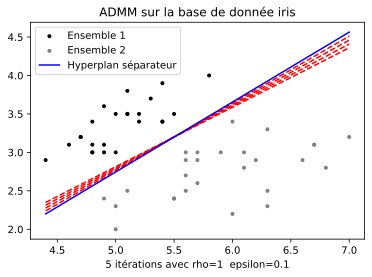

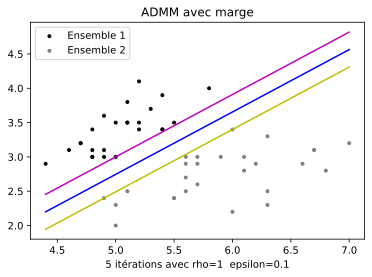

nombre d'itérations à 0.1:  5


In [101]:
u=u_train
v=v_train
X=np.concatenate((-u,v),axis=0)
p,q=np.shape(u)[0],np.shape(v)[0]
xsol,lambdsol,compteur=Admm(X,p,q,u,v,rho=1,epsi=0.1,n=2,vue=1)
Ensemble=np.vstack([u,v])

In [67]:
taille_image = 28
image_pixels = taille_image * taille_image

In [9]:
train_data = np.loadtxt ("mnist_train.csv",delimiter=",")
test_data = np.loadtxt ("mnist_test.csv",delimiter=",")

#train_data = np.loadtxt ("fashion-mnist_train.csv",delimiter=",")
#test_data = np.loadtxt ("fashion-mnist_test.csv",delimiter=",")

In [10]:
fac = 0.99 / 255
train_imgs = np.asfarray(train_data[:,1:])*fac + 0.01
test_imgs = np.asfarray(test_data[:,1:])*fac +0.01

In [ ]:
#On itére ce code 9 fois pour enregistrer les wi et bi i€[0,1...9]
for g in range(10):
    
    #Création des ensembles u et v contenant toutes les lignes du nombredetection
    nombredetection =g
    valeurs = train_data [: ,0]
    indiceu =np.where(valeurs==nombredetection )
    indicev =np.where(valeurs!=nombredetection )
    u=train_imgs [indiceu]
    v=train_imgs [indicev]   
    
    n=784
    X=np.concatenate((-u,v),axis=0)
    p,q=np.shape(u)[0],np.shape(v)[0]
    
    #On utilise notre fonction Admm avec un rho et epsi pas trop grand (sinon c'est plus long)
    xsol,lambdsol,compteur=Admm(X,p,q,u,v,rho=1,epsi=10**(-1),n=784,vue=0)
    
    w=xsol[:784]
    
    img_ordi =w.reshape ((28 ,28) )
    img_ordi = cv2 . normalize ( img_ordi , dst=None , alpha=0 , beta =255 , norm_type = cv2 . NORM_MINMAX , dtype=cv2. CV_8U )
    cv2 . imwrite ("{}_du_SVM.png".format(g), img_ordi)
       
    mu1 =w[:p]
    mu2 =w[p:]
    result1=np.nonzero(mu1)[0]
    result2=np.nonzero(mu2)[0]
    print("{}/9".format(g))
    
    #On calcul une solution « stable » numériquement de b
    b=0
    if result1 .size >0 :
        for i in np. nditer ( result1 ) :
            b =(1/(2* len ( result1 ) ) ) *u[i ,:] @w+b
    if result2 .size >0 :
        for j in np. nditer ( result2 ) :
            b =(1/(2* len ( result2 ) ) ) *v[j ,:] @w+b
            
    ww="w"+str(g)
    bb="b"+str(g)
    np.save(ww,w)
    np.save(bb,b)


In [125]:
w0,b0=np.load("w0.npy"),np.load("b0.npy")
w1,b1=np.load("w1.npy"),np.load("b1.npy")
w2,b2=np.load("w2.npy"),np.load("b2.npy")
w3,b3=np.load("w3.npy"),np.load("b3.npy")
w4,b4=np.load("w4.npy"),np.load("b4.npy")
w5,b5=np.load("w5.npy"),np.load("b5.npy")
w6,b6=np.load("w6.npy"),np.load("b6.npy")
w7,b7=np.load("w7.npy"),np.load("b7.npy")
w8,b8=np.load("w8.npy"),np.load("b8.npy")
w9,b9=np.load("w9.npy"),np.load("b9.npy")

#Création des matrices w et b pour simplifier les calculs
w=np.hstack([w0,w1,w2,w3,w4,w5,w6,w7,w8,w9]) 
b=np.hstack([b0,b1,b2,b3,b4,b5,b6,b7,b8,b9])

In [126]:
#Création des matrices w et b pour simplifier les calculs
w=np.hstack([w0,w1,w2,w3,w4,w5,w6,w7,w8,w9]) 
b=np.hstack([b0,b1,b2,b3,b4,b5,b6,b7,b8,b9])

In [127]:
#%%
#Petit algorithme pour avoir un premier coup d'oeil sur les résultats
erreur=0
l=test_imgs.shape[0]
for n in range (l):
    L_correspondance=w.T@test_imgs[n,:]-b
    if list(L_correspondance).index(max(L_correspondance)) != test_data[n,:1][0]:
        erreur+=1

print("erreur: ",erreur*100/l)
print("réussite: ",100-erreur*100/l)

erreur:  16.06
réussite:  83.94


In [130]:
def matrice_conf(test_imgs,test_labels,nombredetection,w,b) :
    Nvp=0
    Nfn=0
    Nfp=0
    Nvn=0
    N,M=test_imgs.shape
    #Cherchons nos Vrai et Faux 
    for k in range(0,N):  
      #val contient le coéfficient de correspondance au chiffre
      val=w.T@test_imgs[k,:]-b
      #on récupere ici l'index de la valeur max qui est supposé etre la solution
      index=list(val).index(max(val))
      if val[index]>0 and test_labels[k]==index :
         Nvp=Nvp+1
      elif val[index]<=0 and test_labels[k]==index :
         Nfn=Nfn+1
      elif val[index]>0 and test_labels[k]!=index :
         Nfp=Nfp+1
      elif val[index]<=0 and test_labels[k]!=index :   
         Nvn=Nvn+1 
             
    
    
    Mc=np.array([[Nvp, Nfn],[Nfp, Nvn] ]) 
            
    print("Matrice de confusion pour tout w (w0,W1...w9) :\n", Mc)
    
    txreussite=100*(Nvp+Nvn)/N
    sensibilite=Nvp/(Nvp+Nfn)
    print('Taux de réussite : {}%'.format(txreussite))
    print('Sensibilité :', sensibilite)         
    return 

matrice_conf(test_imgs,test_data[:,0],1,w,b) 

Matrice de confusion pour tout w c(w0,W1...w9) :
 [[8168  226]
 [1319  287]]
Taux de réussite : 84.55%
Sensibilité : 0.973076006671432
